In [2]:
import pandas as pd
df = pd.read_csv('cardio dataset.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,0
1,1,20228,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,1
2,2,18857,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,1
3,3,17623,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,1
4,4,17474,Female,156,56.0,100,60,Normal,Normal,No,No,No,0


In [3]:
df.shape

(70014, 13)

In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70014 entries, 0 to 70013
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70014 non-null  int64  
 1   age          70014 non-null  int64  
 2   gender       70014 non-null  object 
 3   height       70014 non-null  int64  
 4   weight       70014 non-null  float64
 5   ap_hi        70014 non-null  int64  
 6   ap_lo        70014 non-null  int64  
 7   cholesterol  70014 non-null  object 
 8   gluc         70014 non-null  object 
 9   smoke        70014 non-null  object 
 10  alco         70014 non-null  object 
 11  active       70014 non-null  object 
 12  cardio       70014 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 6.9+ MB


In [6]:
df.describe()

,id,age,height,weight,ap_hi,ap_lo,cardio
count,70014.000000,70014.000000,70014.000000,70014.000000,70014.000000,70014.000000,70014.000000
mean,49963.108621,19468.851501,164.358285,74.205677,128.816180,96.626703,0.499686
std,28855.949145,2467.272189,8.210195,14.396019,153.996321,188.453930,0.500003
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,24991.500000,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,49988.500000,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,74880.750000,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


In [7]:
df.isna().sum() * 100

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
df = df.drop(columns=['id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,0
1,20228,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,1
2,18857,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,1
3,17623,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,1
4,17474,Female,156,56.0,100,60,Normal,Normal,No,No,No,0


In [9]:
num_no = df['smoke'].value_counts().get('No', 0)
num_yes = df['smoke'].value_counts().get('Yes', 0)
num_no,num_yes

(63842, 6172)

In [10]:
import numpy as np

num_no = df['smoke'].value_counts().get('No', 0)
num_yes = df['smoke'].value_counts().get('Yes', 0)

proportion = 0.2
num_no_to_change = int(num_no * proportion)
num_yes_to_change = int(num_yes * proportion)
no_indices = df[df['smoke'] == 'No'].index
yes_indices = df[df['smoke'] == 'Yes'].index

np.random.seed(42)  # For reproducibility
no_indices_to_change = np.random.choice(no_indices, num_no_to_change, replace=False)
yes_indices_to_change = np.random.choice(yes_indices, num_yes_to_change, replace=False)
df.loc[no_indices_to_change, 'smoke'] = 'Frequently'
df.loc[yes_indices_to_change, 'smoke'] = 'Frequently'
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,0
1,20228,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,1
2,18857,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,1
3,17623,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,1
4,17474,Female,156,56.0,100,60,Normal,Normal,Frequently,No,No,0


In [11]:
num_no = df['alco'].value_counts().get('No', 0)
num_yes = df['alco'].value_counts().get('Yes', 0)

proportion = 0.2
num_no_to_change = int(num_no * proportion)
num_yes_to_change = int(num_yes * proportion)
no_indices = df[df['alco'] == 'No'].index
yes_indices = df[df['alco'] == 'Yes'].index

np.random.seed(42)  # For reproducibility
no_indices_to_change = np.random.choice(no_indices, num_no_to_change, replace=False)
yes_indices_to_change = np.random.choice(yes_indices, num_yes_to_change, replace=False)
df.loc[no_indices_to_change, 'alco'] = 'Frequently'
df.loc[yes_indices_to_change, 'alco'] = 'Frequently'
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,0
1,20228,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,1
2,18857,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,1
3,17623,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,1
4,17474,Female,156,56.0,100,60,Normal,Normal,Frequently,Frequently,No,0


In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [13]:
numerical_columns = df.select_dtypes(include=['number']).columns.to_list()
numerical_columns

['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cardio']

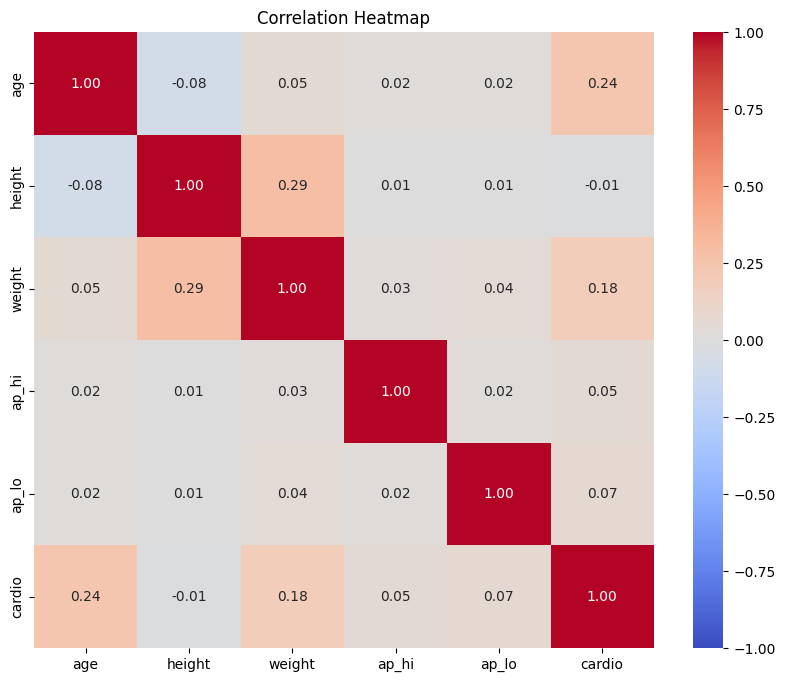

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

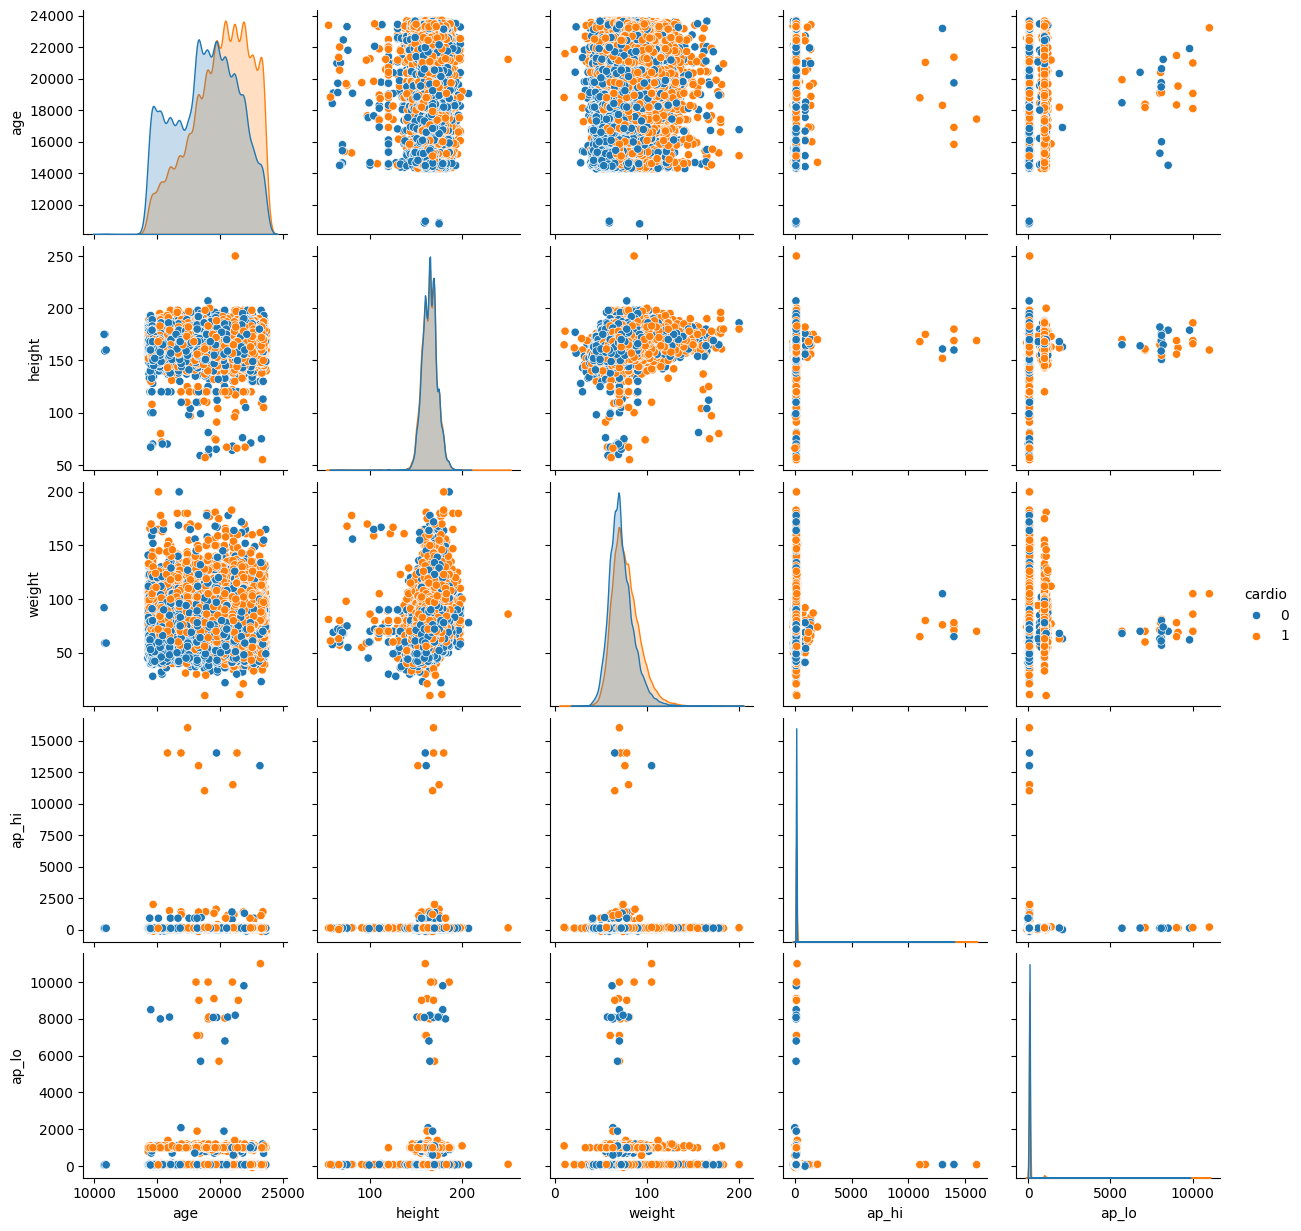

In [26]:
sns.pairplot(df, hue='cardio')
plt.show()

In [15]:
df['cardio'].value_counts()

cardio
0    35029
1    34985
Name: count, dtype: int64

In [16]:
X = df.drop(columns=['cardio'])
y = df[['cardio']]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [18]:
X_train.shape,X_test.shape

((56011, 11), (14003, 11))

In [19]:
y_train.shape,y_test.shape

((56011, 1), (14003, 1))

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_columns.remove('cardio')
column_transformer = make_column_transformer(
    (StandardScaler(), numerical_columns),
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
)

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

In [21]:
X_train.shape,X_test.shape

((56011, 21), (14003, 21))

In [22]:
label = y_test['cardio'].unique().tolist()
label

[1, 0]

In [23]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, log_loss, classification_report
import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, y_train, X_test, y_test, label, include_log_loss=True):
    print(f'Results for {model.__class__.__name__}:\n')

    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f'Training time (sec) = {train_time}')

    y_pred_train = model.predict(X_train)

    start_time = time.time()
    y_pred_test = model.predict(X_test)
    test_time = time.time() - start_time
    print(f'Prediction time (sec) = {test_time}')

    y_pred_prob_train = model.predict_proba(X_train) if hasattr(model, 'predict_proba') else None
    y_pred_prob_test = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

    confusion_mat = confusion_matrix(y_test, y_pred_test)
    misclassified = np.sum(y_pred_test != y_test.values.ravel())
    acc_train = balanced_accuracy_score(y_train, y_pred_train)
    acc_test = balanced_accuracy_score(y_test, y_pred_test)

    loss_train, loss_test = None, None
    if include_log_loss and y_pred_prob_test is not None:
        loss_train = log_loss(y_train, y_pred_prob_train)
        loss_test = log_loss(y_test, y_pred_prob_test)

    print(f'\nTraining score = {acc_train}')
    print(f'Testing score = {acc_test}\n')

    for i, class_label in enumerate(label):
        err = np.sum(confusion_mat[i]) - confusion_mat[i][i]
        print(f'No of misclassified for class {class_label} (test data) = {err}')

    print(f'Total no of misclassified points (test data) = {misclassified}')
    print(f'Total % of misclassified points (test data) = {misclassified / len(y_test)}\n')

    if loss_train is not None and loss_test is not None:
        print(f'Training log_loss = {loss_train}')
        print(f'Testing log_loss = {loss_test}\n')

    print('Confusion matrix:')
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test)
    plt.show()

    print('Classification report:\n')
    print(classification_report(y_test, y_pred_test))
    print('**************************************************************************')

    return [acc_train, acc_test, misclassified, misclassified / len(y_test), loss_train, loss_test, train_time, test_time]

Results for LogisticRegression:



Training time (sec) = 5.137005567550659
Prediction time (sec) = 0.003427267074584961

Training score = 0.718295933166151
Testing score = 0.7276055383794637

No of misclassified for class 1 (test data) = 1644
No of misclassified for class 0 (test data) = 2170
Total no of misclassified points (test data) = 3814
Total % of misclassified points (test data) = 0.2723702063843462

Training log_loss = 0.5796365096994724
Testing log_loss = 0.5732343807193453

Confusion matrix:


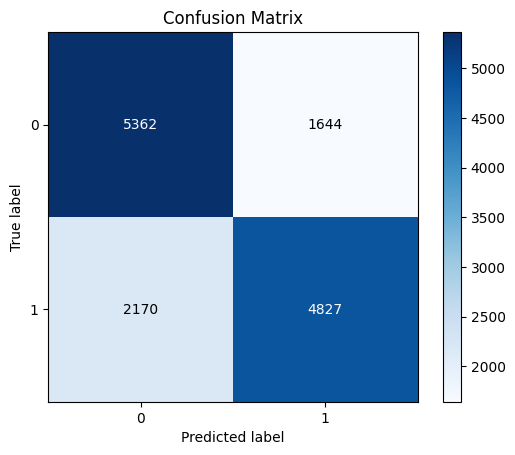

Classification report:

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      7006
           1       0.75      0.69      0.72      6997

    accuracy                           0.73     14003
   macro avg       0.73      0.73      0.73     14003
weighted avg       0.73      0.73      0.73     14003

**************************************************************************


In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced', n_jobs=-1)
LR_results = evaluate_model(lr, X_train, y_train, X_test, y_test, label)

Results for DecisionTreeClassifier:

Training time (sec) = 2.236703395843506
Prediction time (sec) = 0.019667387008666992

Training score = 0.9998929450808265
Testing score = 0.638937944980376

No of misclassified for class 1 (test data) = 2567
No of misclassified for class 0 (test data) = 2489
Total no of misclassified points (test data) = 5056
Total % of misclassified points (test data) = 0.3610654859672927

Training log_loss = 0.0001485024104115575
Testing log_loss = 13.014119226978242

Confusion matrix:


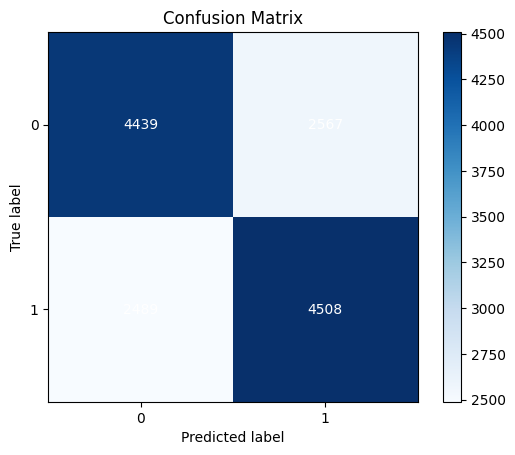

Classification report:

              precision    recall  f1-score   support

           0       0.64      0.63      0.64      7006
           1       0.64      0.64      0.64      6997

    accuracy                           0.64     14003
   macro avg       0.64      0.64      0.64     14003
weighted avg       0.64      0.64      0.64     14003

**************************************************************************


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight='balanced')
DTC_results = evaluate_model(dtc, X_train, y_train, X_test, y_test, label)

Results for LinearSVC:



Training time (sec) = 0.7718780040740967
Prediction time (sec) = 0.0028443336486816406

Training score = 0.6490649727427649
Testing score = 0.6589836470432191

No of misclassified for class 1 (test data) = 2193
No of misclassified for class 0 (test data) = 2582
Total no of misclassified points (test data) = 4775
Total % of misclassified points (test data) = 0.34099835749482255

Confusion matrix:


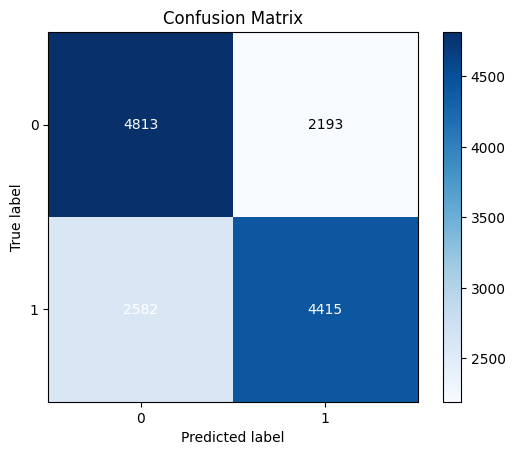

Classification report:

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      7006
           1       0.67      0.63      0.65      6997

    accuracy                           0.66     14003
   macro avg       0.66      0.66      0.66     14003
weighted avg       0.66      0.66      0.66     14003

**************************************************************************


In [26]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(class_weight='balanced')
LSVC_results = evaluate_model(lsvc, X_train, y_train, X_test, y_test, label)

Results for ExtraTreesClassifier:

Training time (sec) = 38.441831827163696
Prediction time (sec) = 2.2115466594696045

Training score = 0.9998929450808265
Testing score = 0.7023466196576804

No of misclassified for class 1 (test data) = 2054
No of misclassified for class 0 (test data) = 2114
Total no of misclassified points (test data) = 4168
Total % of misclassified points (test data) = 0.29765050346354355

Training log_loss = 0.00015891507022318011
Testing log_loss = 0.6211652457584576

Confusion matrix:


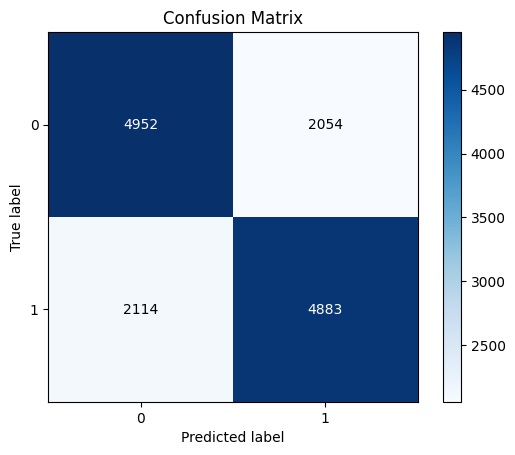

Classification report:

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      7006
           1       0.70      0.70      0.70      6997

    accuracy                           0.70     14003
   macro avg       0.70      0.70      0.70     14003
weighted avg       0.70      0.70      0.70     14003

**************************************************************************


In [27]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(class_weight='balanced')
ETC_results = evaluate_model(etc, X_train, y_train, X_test, y_test, label)

Results for RandomForestClassifier:



Training time (sec) = 38.49980044364929
Prediction time (sec) = 2.6734282970428467

Training score = 0.9998750133436146
Testing score = 0.7244068570474578

No of misclassified for class 1 (test data) = 1829
No of misclassified for class 0 (test data) = 2030
Total no of misclassified points (test data) = 3859
Total % of misclassified points (test data) = 0.27558380347068484

Training log_loss = 0.1512088268607871
Testing log_loss = 0.576198104736876

Confusion matrix:


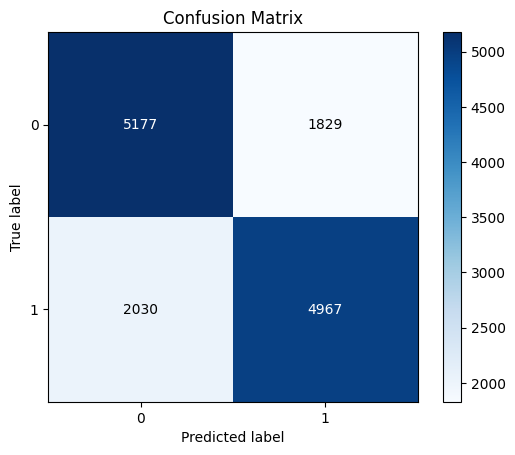

Classification report:

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      7006
           1       0.73      0.71      0.72      6997

    accuracy                           0.72     14003
   macro avg       0.72      0.72      0.72     14003
weighted avg       0.72      0.72      0.72     14003

**************************************************************************


In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight='balanced')
RFC_results = evaluate_model(rfc, X_train, y_train, X_test, y_test, label)

Results for GradientBoostingClassifier:



Training time (sec) = 41.808823108673096
Prediction time (sec) = 0.10716938972473145

Training score = 0.7359550936922814
Testing score = 0.7476005274639337

No of misclassified for class 1 (test data) = 1496
No of misclassified for class 0 (test data) = 2038
Total no of misclassified points (test data) = 3534
Total % of misclassified points (test data) = 0.25237449118046135

Training log_loss = 0.5372556455214249
Testing log_loss = 0.5299178944283192

Confusion matrix:


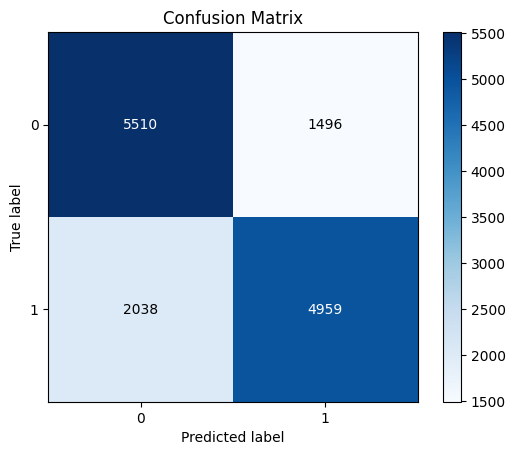

Classification report:

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      7006
           1       0.77      0.71      0.74      6997

    accuracy                           0.75     14003
   macro avg       0.75      0.75      0.75     14003
weighted avg       0.75      0.75      0.75     14003

**************************************************************************


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
GBC_results = evaluate_model(gbc, X_train, y_train, X_test, y_test, label)

In [30]:
s1=[LR_results,LSVC_results,DTC_results,ETC_results,RFC_results,GBC_results]
s2=['LR','LSVC','DTC','ETC','RFC','GBC']
col=['Train score','Test score','Missclassified-point','% missclasification','Train log-loss','Test log-loss','Training time','Prediction time']
result=dict.fromkeys(s2,None)

for i in range(len(s1)):
    result[s2[i]] = s1[i]

temp = pd.DataFrame.from_dict(result, orient='index',columns=col).reset_index()
result = temp.rename(columns={'index':'Classifiers'})
result

,Classifiers,Train score,Test score,Missclassified-point,% missclasification,Train log-loss,Test log-loss,Training time,Prediction time
0,LR,0.718296,0.727606,3814,0.272370,0.579637,0.573234,5.137006,0.003427
1,LSVC,0.649065,0.658984,4775,0.340998,NaN,NaN,0.771878,0.002844
2,DTC,0.999893,0.638938,5056,0.361065,0.000149,13.014119,2.236703,0.019667
3,ETC,0.999893,0.702347,4168,0.297651,0.000159,0.621165,38.441832,2.211547
4,RFC,0.999875,0.724407,3859,0.275584,0.151209,0.576198,38.499800,2.673428
5,GBC,0.735955,0.747601,3534,0.252374,0.537256,0.529918,41.808823,0.107169


In [31]:
column_transformer

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'height', 'weight', 'ap_hi', 'ap_lo']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'cholesterol', 'gluc', 'smoke',
                                  'alco', 'active'])])

In [32]:
from sklearn.pipeline import make_pipeline
import joblib
pipeline = make_pipeline(column_transformer, gbc)
joblib.dump(pipeline, 'model_pipeline.joblib')

['model_pipeline.joblib']

In [40]:
pred = pipeline.predict(X.head(2).tail(1))[0]
pred

1

In [41]:
prob = round(np.max(pipeline.predict_proba(X.head(1).tail(1))),2)
prob

0.83

In [42]:
categorical_columns

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

In [43]:
categorical_column_val = {}
for col in categorical_columns:
    categorical_column_val[col] = X[col].unique().tolist()

In [44]:
categorical_column_val

{'gender': ['Male', 'Female'],
 'cholesterol': ['Normal', 'Well Above Normal', 'Above Normal'],
 'gluc': ['Normal', 'Above Normal', 'Well Above Normal'],
 'smoke': ['No', 'Frequently', 'Yes'],
 'alco': ['No', 'Frequently', 'Yes'],
 'active': ['Yes', 'No']}

In [45]:
import json
with open('categorical_column_val.json', 'w') as f:
    json.dump(categorical_column_val, f)

In [46]:
X.head(2)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,Male,168,62.0,110,80,Normal,Normal,No,No,Yes
1,20228,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes


In [47]:
y.head(2)

,cardio
0,0
1,1


In [48]:
pipeline.predict(X.head(2))

array([0, 1])

In [49]:
pipeline.predict_proba(X.head(2))

array([[0.82585594, 0.17414406],
       [0.14929312, 0.85070688]])

In [50]:
tips = {}
tips[0] = []
tips[0].append("""You do not have any cardiovascular problems at the moment but regular physical activity is crucial for cardiovascular health. Aim for a mix of aerobic, strength, and flexibility exercises.
As for food, adopt healthy eating habits to avoid any problems in the future""")

In [51]:
tips[1] = []

tips[1].append("""Exercise Plans:

Aerobic Exercise
Frequency: 3-5 days a week, gradually increasing to 5 days if well-tolerated.
Duration: Start with shorter sessions (10-15 minutes) and gradually increase to 30-60 minutes.
Intensity: Begin with light to moderate intensity (40-60% of maximum heart rate) and only increase to moderate (60-70%) after assessing tolerance. Use the "talk test" to ensure you're not overexerting; you should be able to talk but not sing during exercise.
Activities: Choose low-impact activities like walking, cycling, or swimming. Avoid high-impact or strenuous activities initially.

Strength Training
Frequency: 2 days a week to start, potentially increasing to 3 days if well-tolerated.
Duration: 15-20 minutes per session.
Intensity: Use light to moderate weights (40-60% of one-rep max). Focus on higher repetitions (12-15 reps) rather than heavier weights.
Activities: Prioritize exercises that use resistance bands or bodyweight to reduce the risk of injury. Avoid straining or holding breath (Valsalva maneuver).

Flexibility and Balance Exercises
Frequency: 2-3 days a week.
Duration: 10-15 minutes per session.
Activities: Emphasize gentle stretching, yoga, or tai chi. These activities can improve flexibility and balance, reducing the risk of falls.

Safety Tips
Warm-Up and Cool-Down: Ensure a proper warm-up and cool-down period of at least 5-10 minutes to gradually increase and decrease heart rate.

Monitor Symptoms: Pay close attention to any warning signs like chest pain, dizziness, shortness of breath, or palpitations. Stop exercising immediately if any of these symptoms occur and seek medical advice.

Hydration: Stay well-hydrated, especially if taking medications that affect fluid balance.

Supervision: Initially, consider exercising under the supervision of a cardiac rehabilitation specialist or a fitness professional experienced in working with cardiovascular patients.

Additional Recommendations
Regular Check-Ups: Have regular follow-ups with your healthcare provider to monitor your condition and adjust the exercise program as needed.

Personalized Plan: Your healthcare provider can help tailor the exercise program to your specific needs and limitations, ensuring a safe and effective approach to improving cardiovascular health.""")

tips[1].append("""Recommended Food Items:
1. Emphasize Fruits and Vegetables
Variety: Aim for a colorful array of fruits and vegetables.
Portion: Fill half your plate with fruits and vegetables at each meal.

2. Whole Grains
Choices: Opt for whole grains like oats, brown rice, quinoa, and whole wheat bread.
Portion: At least half of your grain intake should be whole grains.

3. Healthy Proteins
Sources: Lean meats (chicken, turkey), fish, legumes (beans, lentils), nuts, and seeds.
Fish: Include fatty fish (salmon, mackerel) rich in omega-3 fatty acids at least twice a week.

4. Healthy Fats
Sources: Avocado, olive oil, nuts, and seeds.
Limit: Reduce intake of saturated and trans fats found in red meat, full-fat dairy products, and processed foods.

5. Reduced Sodium
Limit: Aim for less than 2,300 milligrams of sodium per day (ideally 1,500 mg).
Tips: Avoid processed and packaged foods, use herbs and spices for flavor instead of salt.

6. Limit Added Sugars
Sources: Avoid sugary drinks, sweets, and processed foods high in added sugars.
Tips: Read food labels and choose products with little to no added sugars.

7. Moderate Alcohol
Limit: If you drink alcohol, do so in moderation. This means up to one drink per day for women and up to two drinks per day for men.""")

tips[1].append("""Sample Meal Plans:

Breakfast
Oatmeal topped with fresh berries and a handful of nuts.
A glass of low-fat milk or a serving of Greek yogurt.

Lunch
Grilled chicken salad with mixed greens, cherry tomatoes, cucumbers, and a vinaigrette dressing.
A side of whole grain bread.

Snack
A piece of fruit (apple, orange) or a handful of unsalted nuts.

Dinner
Baked salmon with a side of quinoa and steamed broccoli.
A mixed green salad with olive oil and lemon juice dressing.

Snack
A small bowl of mixed berries or a serving of hummus with carrot sticks.

Hydration
Water: Aim for at least 8 glasses of water per day.
Limit: Avoid sugary drinks and limit caffeinated beverages.""")

In [52]:
tips[0]

['You do not have any cardiovascular problems at the moment but regular physical activity is crucial for cardiovascular health. Aim for a mix of aerobic, strength, and flexibility exercises.\nAs for food, adopt healthy eating habits to avoid any problems in the future']

In [53]:
tips[1]

['Exercise Plans:\n\nAerobic Exercise\nFrequency: 3-5 days a week, gradually increasing to 5 days if well-tolerated.\nDuration: Start with shorter sessions (10-15 minutes) and gradually increase to 30-60 minutes.\nIntensity: Begin with light to moderate intensity (40-60% of maximum heart rate) and only increase to moderate (60-70%) after assessing tolerance. Use the "talk test" to ensure you\'re not overexerting; you should be able to talk but not sing during exercise.\nActivities: Choose low-impact activities like walking, cycling, or swimming. Avoid high-impact or strenuous activities initially.\n\nStrength Training\nFrequency: 2 days a week to start, potentially increasing to 3 days if well-tolerated.\nDuration: 15-20 minutes per session.\nIntensity: Use light to moderate weights (40-60% of one-rep max). Focus on higher repetitions (12-15 reps) rather than heavier weights.\nActivities: Prioritize exercises that use resistance bands or bodyweight to reduce the risk of injury. Avoid s

In [54]:
with open('tips.json', 'w') as f:
    json.dump(tips, f)